In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Adult_with_headers.csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [5]:
df.shape

(32561, 15)

In [6]:
df.replace('?', np.nan, inplace=True)


In [7]:
missing_counts = df.isnull().sum()


In [8]:
df_cleaned = df.dropna()

In [9]:
numerical_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('education_num') 

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [11]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [12]:
standard_scaled = standard_scaler.fit_transform(df_cleaned[numerical_cols])
minmax_scaled = minmax_scaler.fit_transform(df_cleaned[numerical_cols])

In [13]:
standard_scaled[:5], minmax_scaled[:5]

(array([[ 0.03067056, -1.06361075,  0.1484529 , -0.21665953, -0.03542945],
        [ 0.83710898, -1.008707  , -0.14592048, -0.21665953, -2.22215312],
        [-0.04264203,  0.2450785 , -0.14592048, -0.21665953, -0.03542945],
        [ 1.05704673,  0.42580136, -0.14592048, -0.21665953, -0.03542945],
        [-0.77576787,  1.40817572, -0.14592048, -0.21665953, -0.03542945]]),
 array([[0.30136986, 0.0443019 , 0.02174022, 0.        , 0.39795918],
        [0.45205479, 0.0482376 , 0.        , 0.        , 0.12244898],
        [0.28767123, 0.13811345, 0.        , 0.        , 0.39795918],
        [0.49315068, 0.15106831, 0.        , 0.        , 0.39795918],
        [0.15068493, 0.22148843, 0.        , 0.        , 0.39795918]]))

In [14]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [15]:
categorical_cols = df_cleaned.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('income') #target Column
categorical_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [16]:
low_cardinality = [col for col in categorical_cols if df_cleaned[col].nunique() < 5]
high_cardinality = [col for col in categorical_cols if df_cleaned[col].nunique() >= 5]
high_cardinality,low_cardinality

(['workclass',
  'education',
  'marital_status',
  'occupation',
  'relationship',
  'race',
  'native_country'],
 ['sex'])

In [17]:
df_encoded = pd.get_dummies(df_cleaned, columns=low_cardinality)
df_encoded

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,0,0,38,United-States,<=50K,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,40,United-States,>50K,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,0,0,40,United-States,<=50K,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,0,0,20,United-States,<=50K,0,1


In [18]:
label_encoder = LabelEncoder()
for col in high_cardinality:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

In [19]:
df_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,<=50K,0,1
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,<=50K,0,1
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,<=50K,0,1
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,<=50K,0,1
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,<=50K,1,0


In [20]:
df_encoded['capital_diff'] = df_encoded['capital_gain'] - df_encoded['capital_loss']

In [21]:
df_encoded['age_group'] = pd.cut(df_encoded['age'],
                                 bins=[16, 25, 45, 65, 100],
                                 labels=['Young', 'Adult', 'Senior', 'Elderly'])

In [22]:
df_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Female,sex_ Male,capital_diff,age_group
0,39,7,77516,9,13,4,1,1,4,2174,0,40,39,<=50K,0,1,2174,Adult
1,50,6,83311,9,13,2,4,0,4,0,0,13,39,<=50K,0,1,0,Senior
2,38,4,215646,11,9,0,6,1,4,0,0,40,39,<=50K,0,1,0,Adult
3,53,4,234721,1,7,2,6,0,2,0,0,40,39,<=50K,0,1,0,Senior
4,28,4,338409,9,13,2,10,5,2,0,0,40,5,<=50K,1,0,0,Adult


In [23]:
df_encoded['age_group'] = LabelEncoder().fit_transform(df_encoded['age_group'])

In [24]:
# Check for skewness and apply log transformation on 'capital_gain'
df_encoded['capital_gain_log'] = np.log1p(df_encoded['capital_gain'])

In [25]:
df_encoded[['capital_gain', 'capital_gain_log', 'capital_diff', 'age_group']].head()

,capital_gain,capital_gain_log,capital_diff,age_group
0,2174,7.684784,2174,0
1,0,0.000000,0,2
2,0,0.000000,0,0
3,0,0.000000,0,2
4,0,0.000000,0,0


In [26]:
from sklearn.ensemble import IsolationForest

In [27]:
# Apply Isolation Forest to detect outliers
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_pred = iso_forest.fit_predict(df_encoded.select_dtypes(include=[np.number]))

In [28]:
# -1 = outlier, 1 = inlier
df_encoded['outlier'] = outlier_pred
df_no_outliers = df_encoded[df_encoded['outlier'] == 1].drop(columns=['outlier'])

In [29]:
# Check counts before and after outlier removal
before = df_encoded.shape[0]
after = df_no_outliers.shape[0]
outliers_removed = before - after

In [30]:
before, after, outliers_removed

(32561, 32235, 326)

In [31]:
!pip install ppscore

In [32]:
import ppscore as pps

In [33]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=2) 

In [36]:
pps.matrix(df_encoded)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.742600,0.875681,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,75872.186200,77535.141544,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,2.759000,2.806164,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
395,outlier,sex_ Male,0.0,regression,True,mean absolute error,0.336000,0.446299,DecisionTreeRegressor()
396,outlier,capital_diff,0.0,regression,True,mean absolute error,1188.826600,1474.318151,DecisionTreeRegressor()
397,outlier,age_group,0.0,regression,True,mean absolute error,1.142400,1.167232,DecisionTreeRegressor()
398,outlier,capital_gain_log,0.0,regression,True,mean absolute error,0.714858,1.168441,DecisionTreeRegressor()


In [40]:
pps_score=pps.matrix(df_encoded)[['x','y','ppscore']].pivot(columns='x',index='y',values='ppscore')
pps_score

x,age,age_group,capital_diff,capital_gain,capital_gain_log,capital_loss,education,education_num,fnlwgt,hours_per_week,income,marital_status,native_country,occupation,outlier,race,relationship,sex_ Female,sex_ Male,workclass
y,,,,,,,,,,,,,,,,,,,,
age,1.000000,0.623859,0.007082,0.003296,0.003711,0.000000,0.016926,0.016926,0.0,0.002377,0.034161,0.201582,0.000000,0.009148,0.000000,0.0,0.137371,0.000000,0.000000,0.019258
age_group,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.012146,0.012146,0.0,0.028689,0.000000,0.024533,0.000000,0.005283,0.000000,0.0,0.063342,0.000000,0.000000,0.000000
capital_diff,0.000000,0.000000,1.000000,0.845595,0.845392,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
capital_gain,0.000000,0.000000,0.996354,1.000000,0.996114,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
capital_gain_log,0.000000,0.000000,0.998032,0.998032,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
capital_loss,0.000000,0.000000,0.996118,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
education,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
education_num,0.000000,0.000000,0.009724,0.012555,0.012885,0.000000,1.000000,1.000000,0.0,0.000000,0.028055,0.000000,0.000000,0.155121,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
fnlwgt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


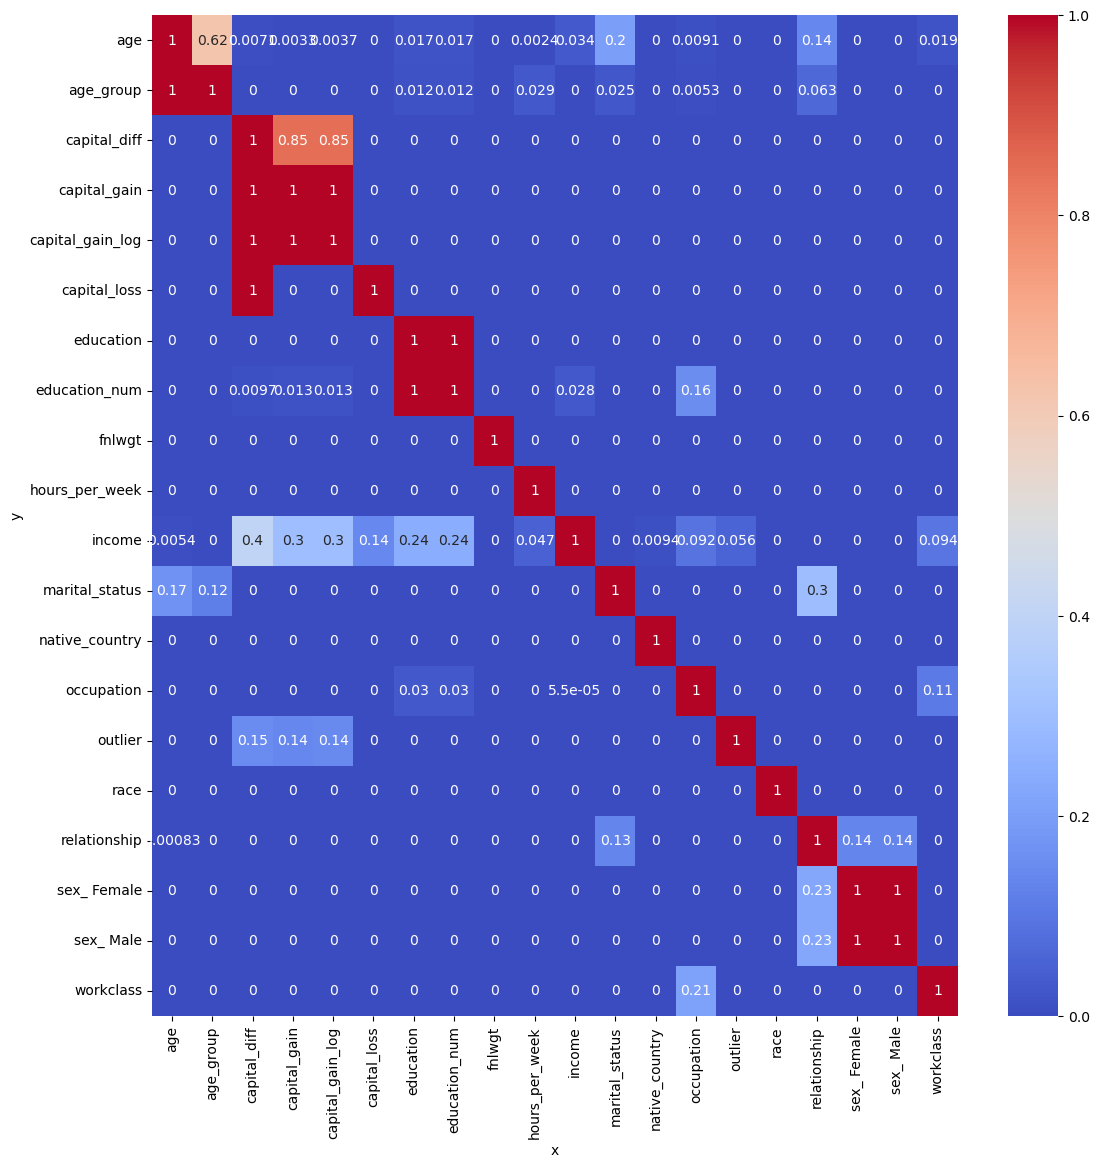

In [56]:
import seaborn as sns
plt.figure(figsize=(13, 13))
sns.heatmap(pps_score,annot=True,cmap=plt.cm.coolwarm)
plt.show()

In [60]:
pps.predictors(df_encoded,y='income')

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,capital_diff,income,0.400876,classification,True,weighted F1,0.653115,0.792173,DecisionTreeClassifier()
1,capital_gain_log,income,0.297578,classification,True,weighted F1,0.653115,0.756341,DecisionTreeClassifier()
2,capital_gain,income,0.297123,classification,True,weighted F1,0.653115,0.756183,DecisionTreeClassifier()
3,education,income,0.243135,classification,True,weighted F1,0.653115,0.737455,DecisionTreeClassifier()
4,education_num,income,0.243135,classification,True,weighted F1,0.653115,0.737455,DecisionTreeClassifier()
5,capital_loss,income,0.141755,classification,True,weighted F1,0.653115,0.702288,DecisionTreeClassifier()
6,workclass,income,0.094056,classification,True,weighted F1,0.653115,0.685742,DecisionTreeClassifier()
7,occupation,income,0.092410,classification,True,weighted F1,0.653115,0.685171,DecisionTreeClassifier()
8,outlier,income,0.056436,classification,True,weighted F1,0.653115,0.672692,DecisionTreeClassifier()
9,hours_per_week,income,0.047278,classification,True,weighted F1,0.653115,0.669515,DecisionTreeClassifier()
